In [9]:
# Importiere die notwendigen Bibliotheken
import pandas as pd
from tabulate import tabulate
from IPython.display import display, HTML
import pandas as pd
from tabulate import tabulate
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Lade die drei CSV-Dateien
csv1 = pd.read_csv('ils_results1.csv')
csv2 = pd.read_csv('ils_results2.csv')


# Kombiniere die Dateien
combined_csv = pd.concat([csv1, csv2])

# Speichere die kombinierte Datei in einer neuen CSV
combined_csv.to_csv('ils_results.csv', index=False)

In [17]:
# 1. Lese die CSV-Datei ein
# Ersetze 'sails_results.csv' durch den Pfad zu deiner CSV-Datei
df = pd.read_csv('ils_results1.csv')

sorted_df = df.sort_values(by='TotalProfit', ascending=False)
# 2. Formatiere die Tabelle mit Pandas Styling für die Anzeige in Jupyter Notebook
styled_df = sorted_df.style.format({
    'TotalProfit': '{:.0f}',   # Formatiere TotalProfit mit 2 Nachkommastellen
    'WaitingTime': '{:.0f}',   # Formatiere WaitingTime mit 2 Nachkommastellen
    'TotalTasks': '{:.0f}',   # Formatiere TotalTasks ohne Nachkommastellen
    'temp_decrease_factor': '{:.2f}',
    'min_temperature' : '{:.0e}'
})

# Zeige die formatierte Tabelle in Jupyter Notebook an
display(styled_df)

# 3. Zeige die Tabelle als ASCII-Tabelle mit 'tabulate' in der Konsole an
# Diese Ausgabe sieht in der Konsole oder im Terminal gut aus
table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

#Sortiere die Tabelle nach der Spalte 'TotalProfit' absteigend

,Instance,MainTasks,sublists_to_modify,consecutive_to_remove,threshold,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit
56,7_8_1,True,2,3,9,2153,19297,923,240,383.303600,360
54,7_8_1,True,2,3,3,2149,22969,920,208,382.959600,360
55,7_8_1,True,2,3,6,2148,22968,919,227,385.111400,360
58,7_8_1,True,2,6,6,2147,19232,917,126,382.964100,360
57,7_8_1,True,2,6,3,2146,21873,915,167,383.604800,360
63,7_8_1,True,5,3,3,2143,23795,917,97,385.238500,360
59,7_8_1,True,2,6,9,2141,22282,914,142,389.532900,360
62,7_8_1,True,2,9,9,2139,21590,916,84,383.006200,360
64,7_8_1,True,5,3,6,2137,23607,915,72,385.897900,360
65,7_8_1,True,5,3,9,2137,25400,914,81,388.397900,360


In [19]:
df = pd.read_csv('ils_results1.csv')

# Round 'RunTime' to the nearest integer
df['RunTime'] = df['RunTime'].round(2).astype(int)

# Convert 'WaitingTime' to integers as it only has whole numbers
df['WaitingTime'] = df['WaitingTime'].astype(int)

# Rename specific columns
df = df.rename(columns={
    'sublists_to_modify': 'Routes',
    'consecutive_to_remove': 'Consecutive Tasks',
    'threshold': 'NoImpr Iterationens',
    # Add more columns to rename as needed
})

#table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
df.head(3)

,Instance,MainTasks,Routes,Consecutive Tasks,NoImpr Iterationens,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit
0,7_2_1,True,2,3,3,778,4621,276,328,363,360
1,7_2_1,True,2,3,6,779,4116,277,381,363,360
2,7_2_1,True,2,3,9,775,5080,275,292,363,360


##### Calculale RPD


In [22]:
#Find the maximum 'TotalProfit' for each 'Instance'
max_profit_per_instance_task = df.groupby(['Instance', 'MainTasks'])['TotalProfit'].transform('max')
# Calculate RPD
df['RPD'] = ((max_profit_per_instance_task - df['TotalProfit']) / max_profit_per_instance_task) * 100

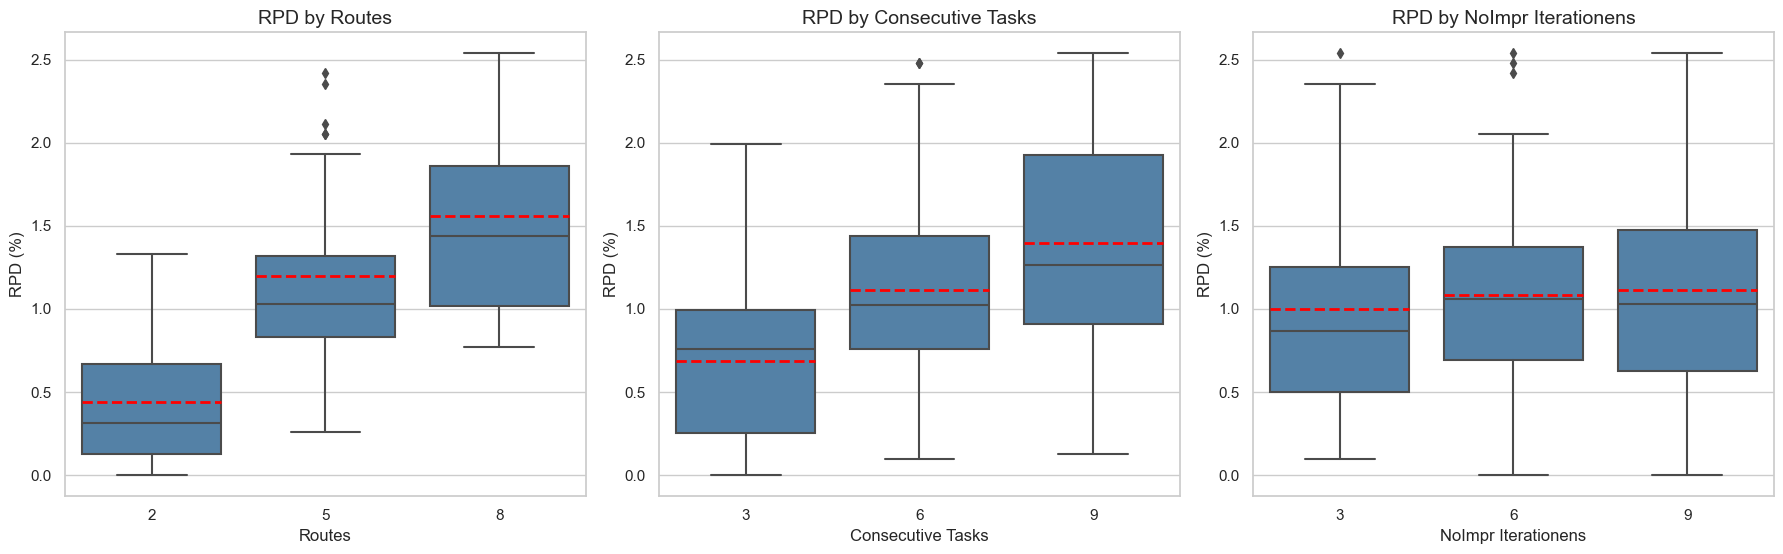

In [23]:
#Assuming 'df' is your DataFrame with the calculated RPD

# Set global plot style to serif font
plt.rcParams["font.family"] = "serif"

# Set seaborn style for whitegrid (can adjust to suit scientific purposes)
sns.set(style="whitegrid")

# Parameters to plot
parameters = ['Routes', 'Consecutive Tasks', 'NoImpr Iterationens']

# Set a consistent color for all box plots
boxplot_color = "steelblue"

# Create subplots - one for each parameter
fig, axes = plt.subplots(1, len(parameters), figsize=(18, 6))

# Loop through the parameters and create boxplots in subplots
for i, param in enumerate(parameters):
    sns.boxplot(x=param, y='RPD', data=df, showmeans=True, meanline=True,
                meanprops={"color": "red", "ls": "--", "lw": 2},
                color=boxplot_color, ax=axes[i])  # Set consistent color
    
    # Set titles for each subplot
    axes[i].set_title(f'RPD by {param}', fontsize=14)
    axes[i].set_xlabel(param, fontsize=12)
    axes[i].set_ylabel('RPD (%)', fontsize=12)

# Adjust the layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure as a PNG file
plt.savefig('rpd_box_plots_scientific.png', dpi=300)  # Save with high dpi for quality

# Show the plot
plt.show()